___
# Análise Exploratória: Variáveis qualitativas
___

## Aula 02


**Links Úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


## <font color='blue'>Empresa de TV</font>

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente, A ou B. 
* EC: apresenta estado civil do cliente no momento da adesão ao plano, Casado, Solteiro e Outros.
* SATISFACAO: grau de satisfação do cliente pelo plano,  Muito satisfeito, Satisfeito, Indiferente, Insatisfeito e Muito insatisfeito.
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV.xls` contém as variáveis descritas acima.

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo da empresa.
Desenvolver as seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) da frequência relativa das variáveis qualitativas.
2. Tabela Cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Documents\INSPER\Ciencia dos Dados\DP\CD1S17\Análise Exploratoria Variáveis Qualitativas


In [3]:
dados = pd.read_excel('EmpresaTV.xlsx')

In [4]:
dados.head()

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6


In [5]:
#Selecionando parte do dataframe - Apenas as variáveis qualitativas
dados.iloc[0:5,0:4]

,CLIENTE,PLANO,EC,SATISFACAO
0,1,A,Casado,Muito Satisfeito
1,2,A,Solteiro,Muito Satisfeito
2,3,A,Outros,Muito Satisfeito
3,4,A,Casado,Satisfeito
4,5,A,Solteiro,Muito Satisfeito


In [6]:
#Selecionando parte do dataframe - Apenas a variável quantitativa
pd.DataFrame(dados.iloc[0:5,-1])

,RENDA
0,21.4
1,17.2
2,15.6
3,10.4
4,17.6


In [7]:
dados.shape

(82, 5)

In [8]:
list(dados)

['CLIENTE', 'PLANO', 'EC', 'SATISFACAO', 'RENDA']

In [9]:
dados.PLANO = dados.PLANO.astype('category')
dados.EC = dados.EC.astype('category')
dados.SATISFACAO = dados.SATISFACAO.astype('category')
dados.RENDA = dados.RENDA.astype('float')

___
# Análise univariada das variáveis qualitativas

In [10]:
# Tabelas univariada
print('Frequências absolutas por PLANO:')
ut1 = dados.PLANO.value_counts().reindex(['A', 'B'])
print(ut1,'\n')

print('Frequências absolutas por Estado Civil:')
ut2 = dados.EC.value_counts().reindex(['Casado', 'Solteiro', 'Outros'])
print(ut2,'\n')

print('Frequências absolutas por SATISFACAO:')
ut3 = dados.SATISFACAO.value_counts().reindex(['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito'])
print(ut3,'\n')

Frequências absolutas por PLANO:
A    46
B    36
Name: PLANO, dtype: int64 

Frequências absolutas por Estado Civil:
Casado      36
Solteiro    33
Outros      13
Name: EC, dtype: int64 

Frequências absolutas por SATISFACAO:
Muito Insatisfeito     8
Insatisfeito          16
Indiferente           19
Satisfeito            27
Muito Satisfeito      12
Name: SATISFACAO, dtype: int64 



In [11]:
# Tabelas univariada
print('Frequências relativas por PLANO:')
ut1 = (dados.PLANO.value_counts(True)*100).round(decimals=1).reindex(['A', 'B'])
print(ut1,'\n')

print('Frequências relativas por Estado Civil:')
ut2 = (dados.EC.value_counts(True)*100).round(decimals=1).reindex(['Casado', 'Solteiro', 'Outros'])
print(ut2,'\n')

print('Frequências relativas por SATISFACAO:')
ut3 = (dados.SATISFACAO.value_counts(True)*100).round(decimals=1).reindex(['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito'])
print(ut3,'\n')


Frequências relativas por PLANO:
A    56.1
B    43.9
Name: PLANO, dtype: float64 

Frequências relativas por Estado Civil:
Casado      43.9
Solteiro    40.2
Outros      15.9
Name: EC, dtype: float64 

Frequências relativas por SATISFACAO:
Muito Insatisfeito     9.8
Insatisfeito          19.5
Indiferente           23.2
Satisfeito            32.9
Muito Satisfeito      14.6
Name: SATISFACAO, dtype: float64 



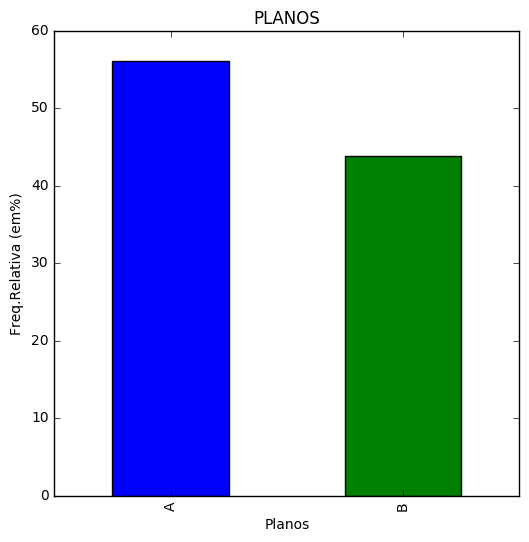

In [12]:
# Gráfico de barras
plot = ut1.plot(kind='bar',title='PLANOS',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Planos')

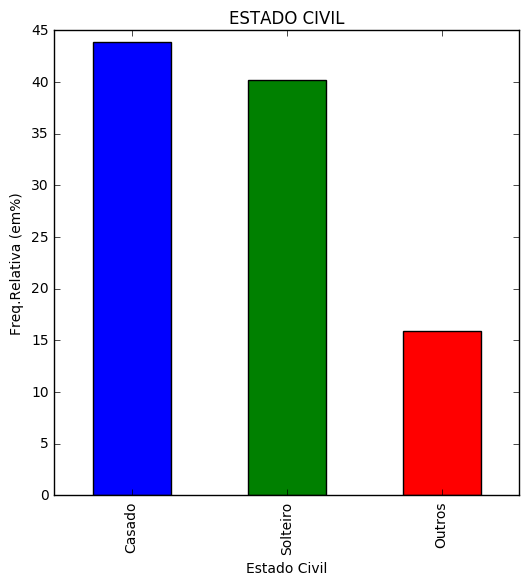

In [13]:
plot = ut2.plot(kind='bar',title='ESTADO CIVIL',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Estado Civil')

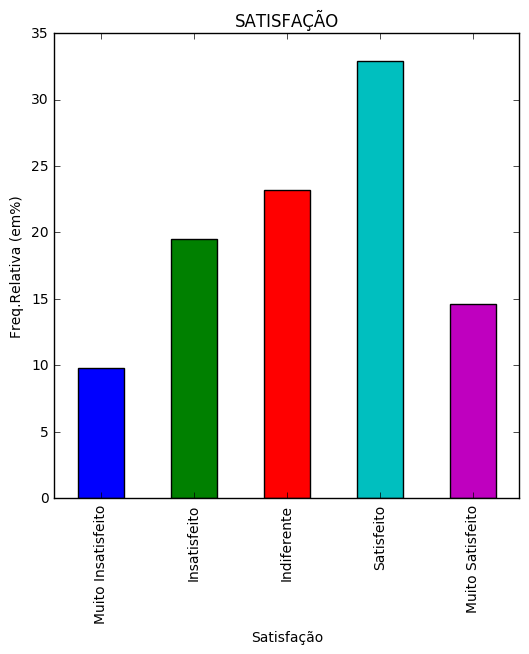

In [14]:
plot = ut3.plot(kind='bar',title='SATISFAÇÃO',figsize=(6, 6),color=('b','g','r','c','m'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Satisfação')

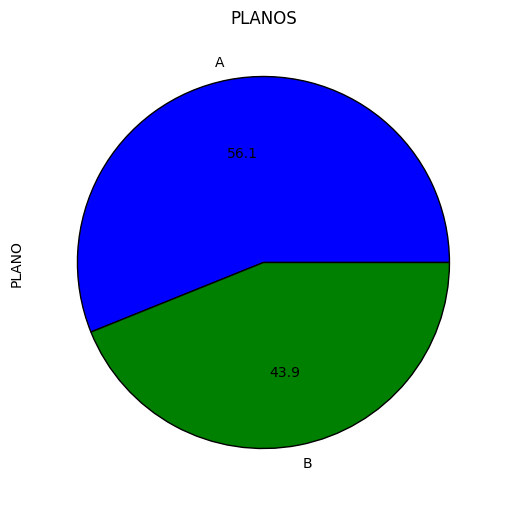

In [15]:
# Gráfico de Pizza
plot = ut1.plot(kind='pie',title='PLANOS',autopct='%.1f',figsize=(6, 6))

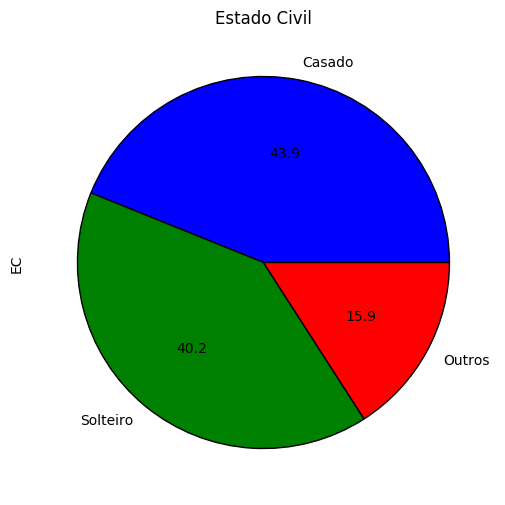

In [16]:
plot = ut2.plot(kind='pie',title='Estado Civil',autopct='%.1f',figsize=(6, 6))

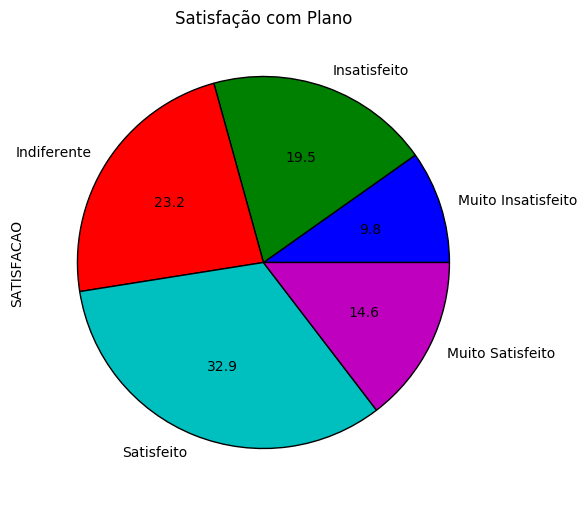

In [17]:
plot = ut3.plot(kind='pie',title='Satisfação com Plano',autopct='%.1f',figsize=(6, 6))

___
# Tabela cruzada entre variáveis qualitativas

## *Análises de Estado Civil versus Plano*

In [18]:
#Tabela cruzada Estado Civil x Plano
print('Tabela Cruzada por total GERAL:')
ct=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO'])
ct=ct.loc[['Casado','Solteiro','Outros','All']]
ct

Tabela Cruzada por total GERAL:


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,26,10,36
Solteiro,13,20,33
Outros,7,6,13
All,46,36,82


In [19]:
#Posição do total geral da tabela nomeada de ct
n=ct.iloc[3,2]

In [20]:
print('Tabela Cruzada por total GERAL (em %):')
ct1=(ct/n*100).round(decimals=1)
ct1

Tabela Cruzada por total GERAL (em %):


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,31.7,12.2,43.9
Solteiro,15.9,24.4,40.2
Outros,8.5,7.3,15.9
All,56.1,43.9,100.0


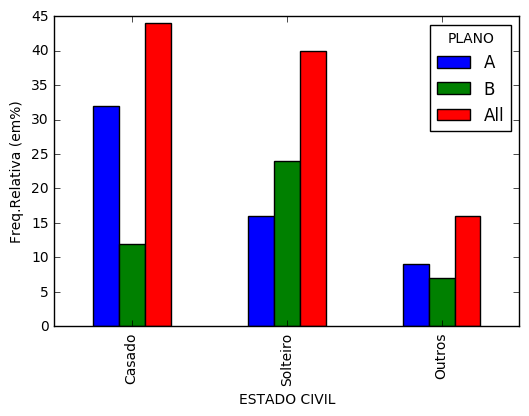

In [21]:
ct1 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO'])
ct1 = ct1.loc[['Casado','Solteiro','Outros','All']]
ct1 = (ct1/len(dados)*100).round(decimals=0)
ct1 = ct1.iloc[0:3,]
plot = ct1.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

In [22]:
#Função que divide cada valor da tabela cruzada pelo total da última linha (quando axis=0) ou da última coluna (quando axis=1)
#Retorna tabela cruzada com valores sem casa decimais
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [23]:
print('Tabela Cruzada por total de COLUNAS (em %):')
ct2=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=0)
ct2=ct2.loc[['Casado','Solteiro','Outros','All']]
ct2

Tabela Cruzada por total de COLUNAS (em %):


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,57.0,28.0,44.0
Solteiro,28.0,56.0,40.0
Outros,15.0,17.0,16.0
All,100.0,100.0,100.0


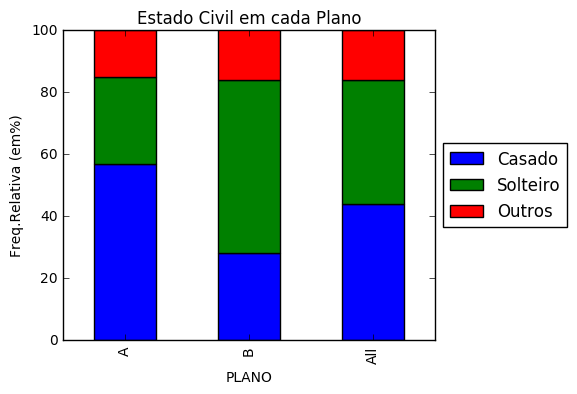

In [24]:
ct2 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=0)
ct2 = ct2.loc[['Casado','Solteiro','Outros','All']]
ct2 = ct2.iloc[0:3,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='Estado Civil em cada Plano')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
print('Tabela Cruzada por total de LINHAS (em %):')
ct3=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=1)
ct3=ct3.loc[['Casado','Solteiro','Outros','All']]
ct3

Tabela Cruzada por total de LINHAS (em %):


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,72.0,28.0,100.0
Solteiro,39.0,61.0,100.0
Outros,54.0,46.0,100.0
All,56.0,44.0,100.0


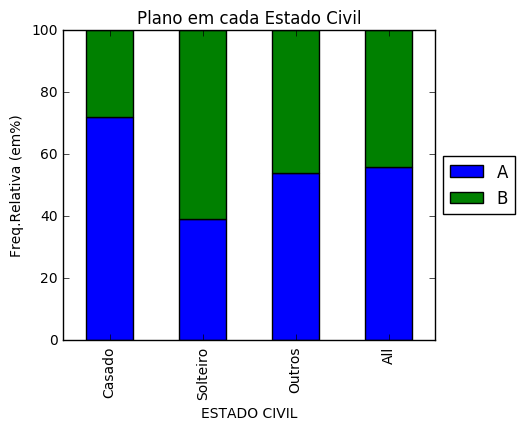

In [26]:
ct3 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=1)
ct3 = ct3.loc[['Casado','Solteiro','Outros','All']]
ct3 = ct3.iloc[:,0:2]
plot = ct3.plot(kind='bar', stacked=True,title='Plano em cada Estado Civil')
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# <font color='red'>É coerente fazer os gráficos apresentados a seguir?</font>

### A questão é: Consegue interpretar corretamente em qual Estado Civil há maior ou menor concentração de cada Plano?? 

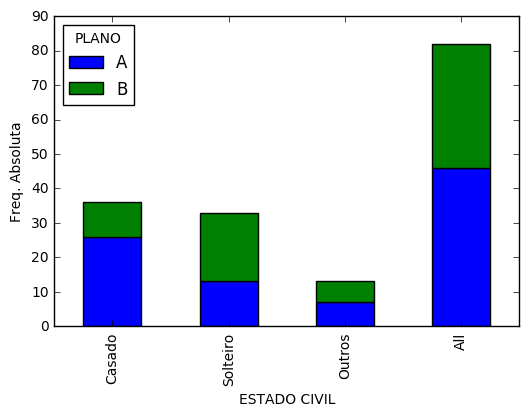

In [27]:
#ct é uma tabela crosstab que considera Estado Civil versus Plano - com frequências absolutas
ct=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO'])
ct=ct.loc[['Casado','Solteiro','Outros','All']]

ct4 = ct.iloc[:,0:2]
plot = ct4.plot(kind='bar',stacked=True)
plt.ylabel('Freq. Absoluta')

### A questão é: Consegue interpretar corretamente em qual Plano há maior ou menor concentração de cada Estado Civil?? 

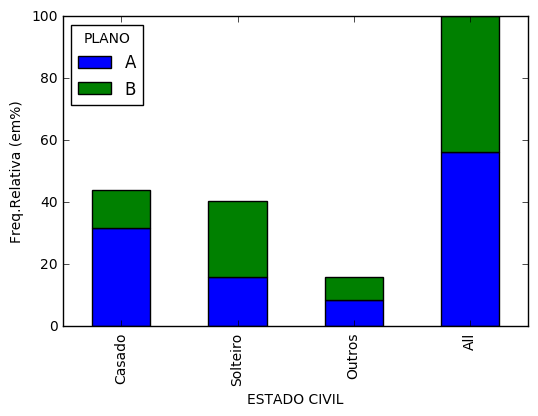

In [28]:
#ct1 é uma tabela crosstab que considera Estado Civil versus Plano - com frequências relativas
ct1=(ct/n*100).round(decimals=1)

ct5 = ct1.iloc[:,0:2]
plot = ct5.plot(kind='bar',stacked=True)
plt.ylabel('Freq.Relativa (em%)')

## *Análise de Satisfação versus Plano*

Agora estude o grau de satisfação dos clientes segundo o plano adquiridos por eles!!
Faça interpretações dos resultados!!

In [29]:
print('Tabela Cruzada Satisfação x Planos:')
ct=pd.crosstab(dados.SATISFACAO,dados.PLANO,margins=True,rownames=['SATISFAÇÃO'], colnames=['PLANO'])
ct=ct.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito']]
ct

Tabela Cruzada Satisfação x Planos:


PLANO,A,B,All
SATISFAÇÃO,,,
Muito Insatisfeito,2,6,8
Insatisfeito,5,11,16
Indiferente,7,12,19
Satisfeito,20,7,27
Muito Satisfeito,12,0,12


___
## Análise das três variáveis qualitativas simultaneamente

Analise o Grau de Satisfação versus Estado Civil separademente para cada plano!

Aqui será necessário usar um filtro em cada uma dessas variáveis selecionando, inicialmente, apenas os clientes com plano A.

Para isso, lembre-se que você pode usar o seguinte código:

* `dados.SATISFACAO[dados.PLANO=='A']`
* `dados.EC[dados.PLANO=='A']`

Faça interpretações dos gráficos/tabelas que serão feitos a seguir por você!!

## *Tabela cruzada de Satisfação versus Estado Civil - PLANO A*

In [30]:
print('Tabela Cruzada Satisfação x Plano A:')
ctECxP_A=pd.crosstab(dados.SATISFACAO[dados.PLANO=='A'],dados.EC[dados.PLANO=='A'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ctECxP_A=ctECxP_A.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito']]
ctECxP_A

Tabela Cruzada Satisfação x Plano A:


ESTADO CIVIL,Casado,Outros,Solteiro,All
SATISFAÇÃO,,,,
Muito Insatisfeito,2,0,0,2
Insatisfeito,2,3,0,5
Indiferente,3,1,3,7
Satisfeito,14,2,4,20
Muito Satisfeito,5,1,6,12


In [31]:
ctECxP_A = ctECxP_A.iloc[0:5,0:3]
ctECxP_A =(ctECxP_A/n*100).round(decimals=1)
ctECxP_A

ESTADO CIVIL,Casado,Outros,Solteiro
SATISFAÇÃO,,,
Muito Insatisfeito,2.4,0.0,0.0
Insatisfeito,2.4,3.7,0.0
Indiferente,3.7,1.2,3.7
Satisfeito,17.1,2.4,4.9
Muito Satisfeito,6.1,1.2,7.3


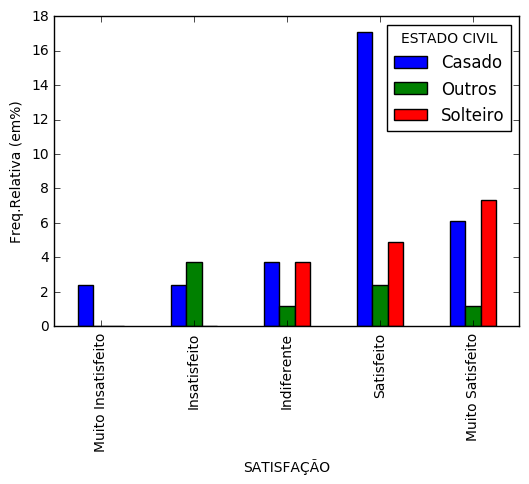

In [32]:
plot = ctECxP_A.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

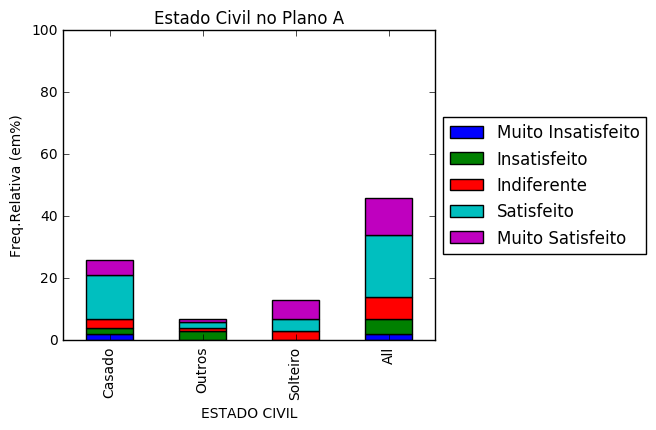

In [33]:

ctECxP_A=pd.crosstab(dados.SATISFACAO[dados.PLANO=='A'],dados.EC[dados.PLANO=='A'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ctECxP_A=ctECxP_A.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito']]
ctECxP_A = ctECxP_A.iloc[:,0:4]
plot = ctECxP_A.T.plot(kind='bar', stacked=True,title='Estado Civil no Plano A')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

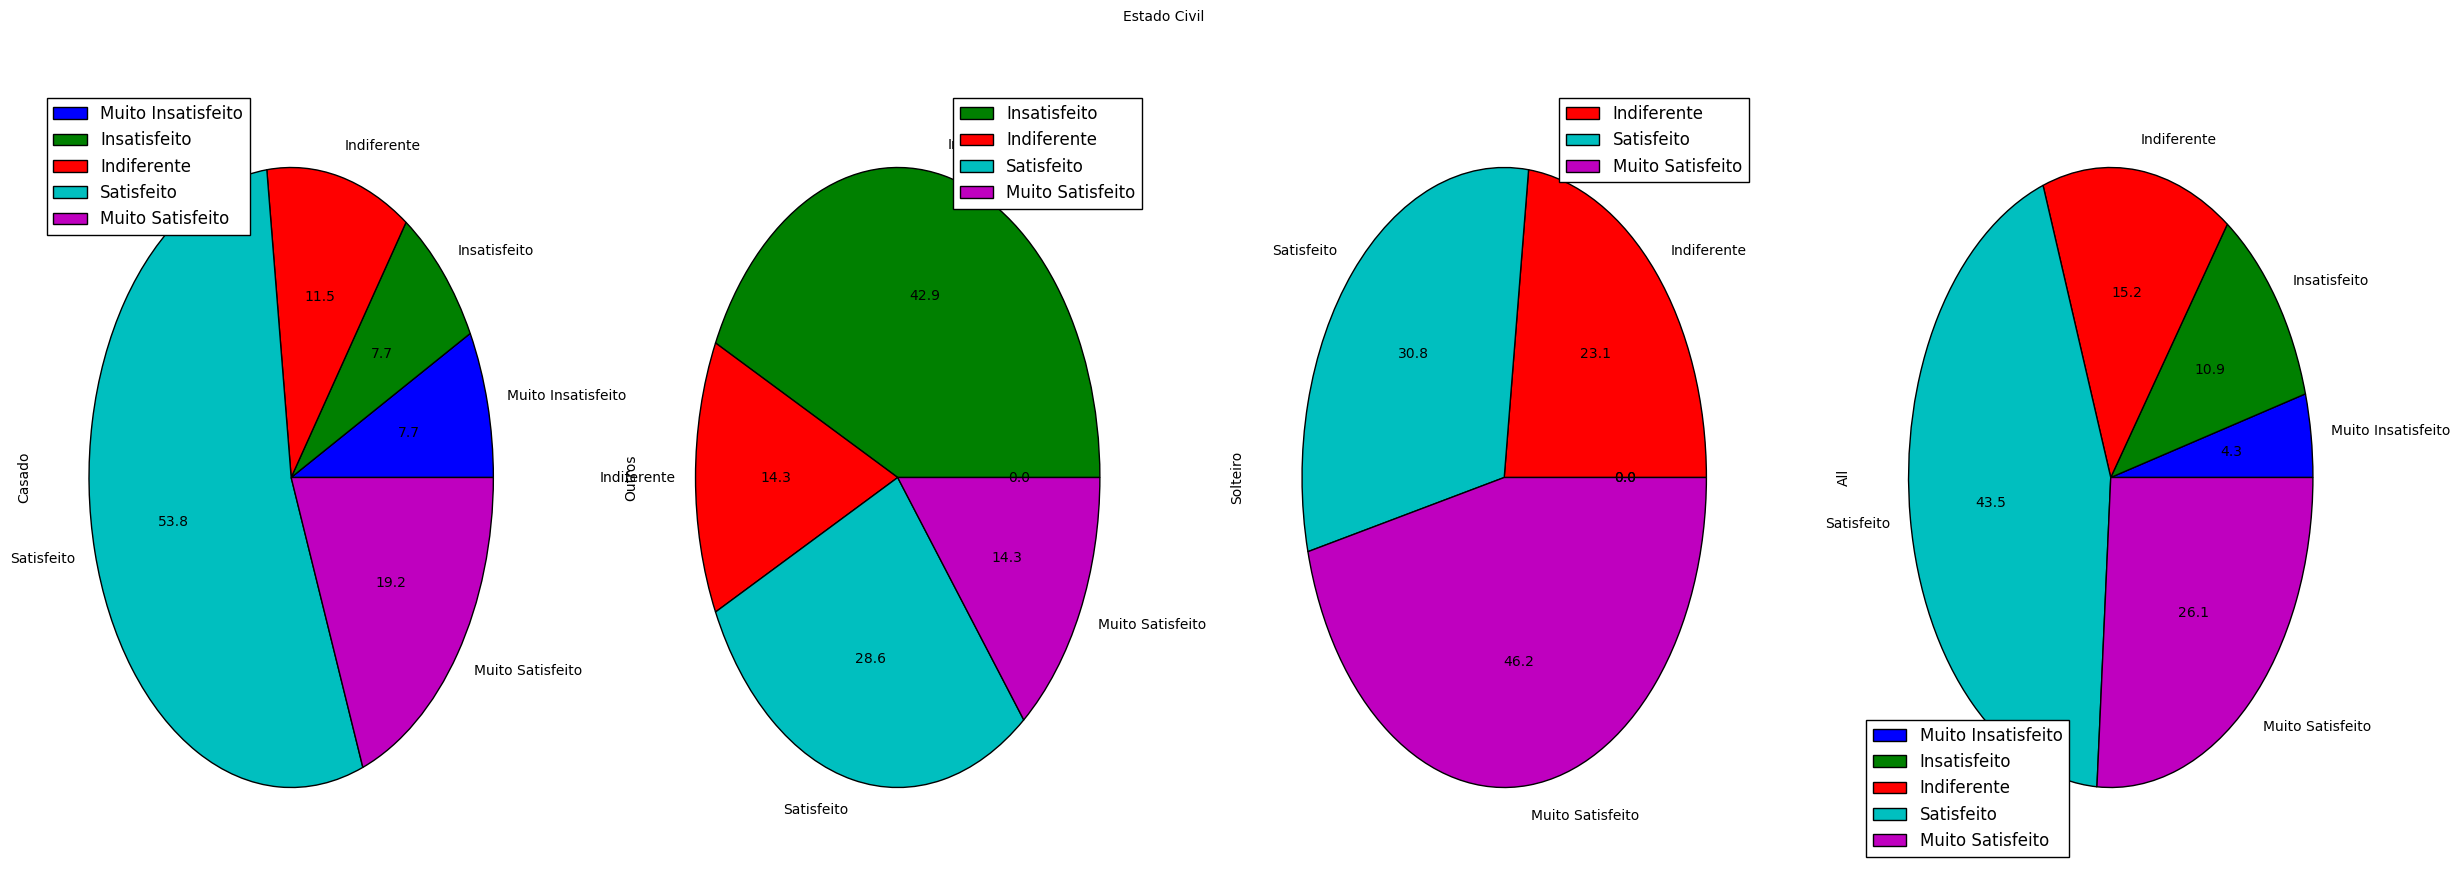

In [34]:
plot = ctECxP_A.plot(kind='pie',title='Estado Civil',autopct='%.1f',figsize=(30, 10),subplots=True)


## *Tabela cruzada de Satisfação versus Estado Civil - PLANO B*

In [35]:
print('Tabela Cruzada Satisfação x Plano B:')
ctECxP_B=pd.crosstab(dados.SATISFACAO[dados.PLANO=='B'],dados.EC[dados.PLANO=='B'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ctECxP_B=ctECxP_B.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito']]
ctECxP_B

Tabela Cruzada Satisfação x Plano B:


ESTADO CIVIL,Casado,Outros,Solteiro,All
SATISFAÇÃO,,,,
Muito Insatisfeito,2,1,3,6
Insatisfeito,2,4,5,11
Indiferente,2,1,9,12
Satisfeito,4,0,3,7
Muito Satisfeito,0,0,0,0


In [36]:
ctECxP_B = ctECxP_A.iloc[0:5,0:3]
ctECxP_B

ESTADO CIVIL,Casado,Outros,Solteiro
SATISFAÇÃO,,,
Muito Insatisfeito,2,0,0
Insatisfeito,2,3,0
Indiferente,3,1,3
Satisfeito,14,2,4
Muito Satisfeito,5,1,6


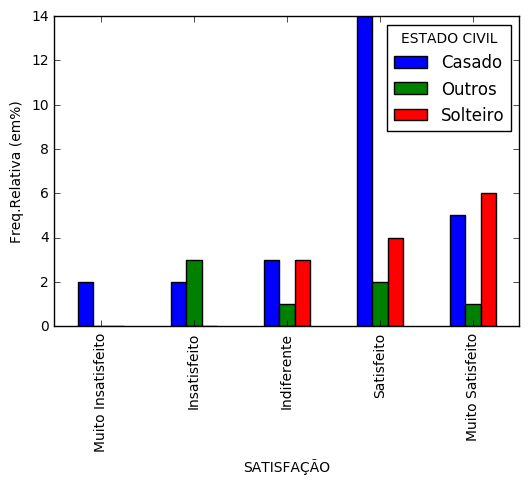

In [37]:
plot = ctECxP_B.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

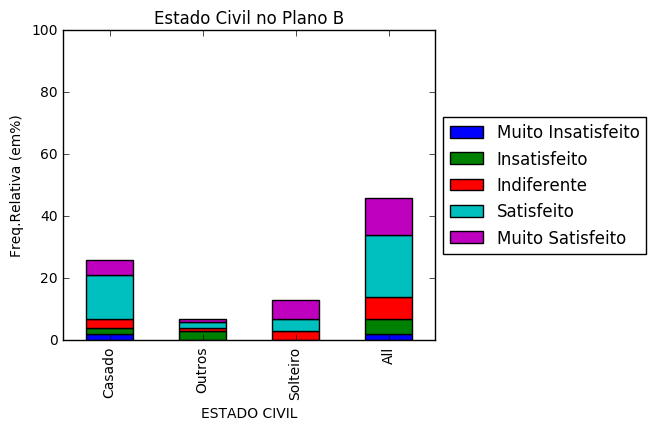

In [38]:
ctECxP_B=pd.crosstab(dados.SATISFACAO[dados.PLANO=='B'],dados.EC[dados.PLANO=='B'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ctECxP_B=ctECxP_A.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito']]
ctECxP_B = ctECxP_B.iloc[:,0:4]
plot = ctECxP_B.T.plot(kind='bar', stacked=True,title='Estado Civil no Plano B')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

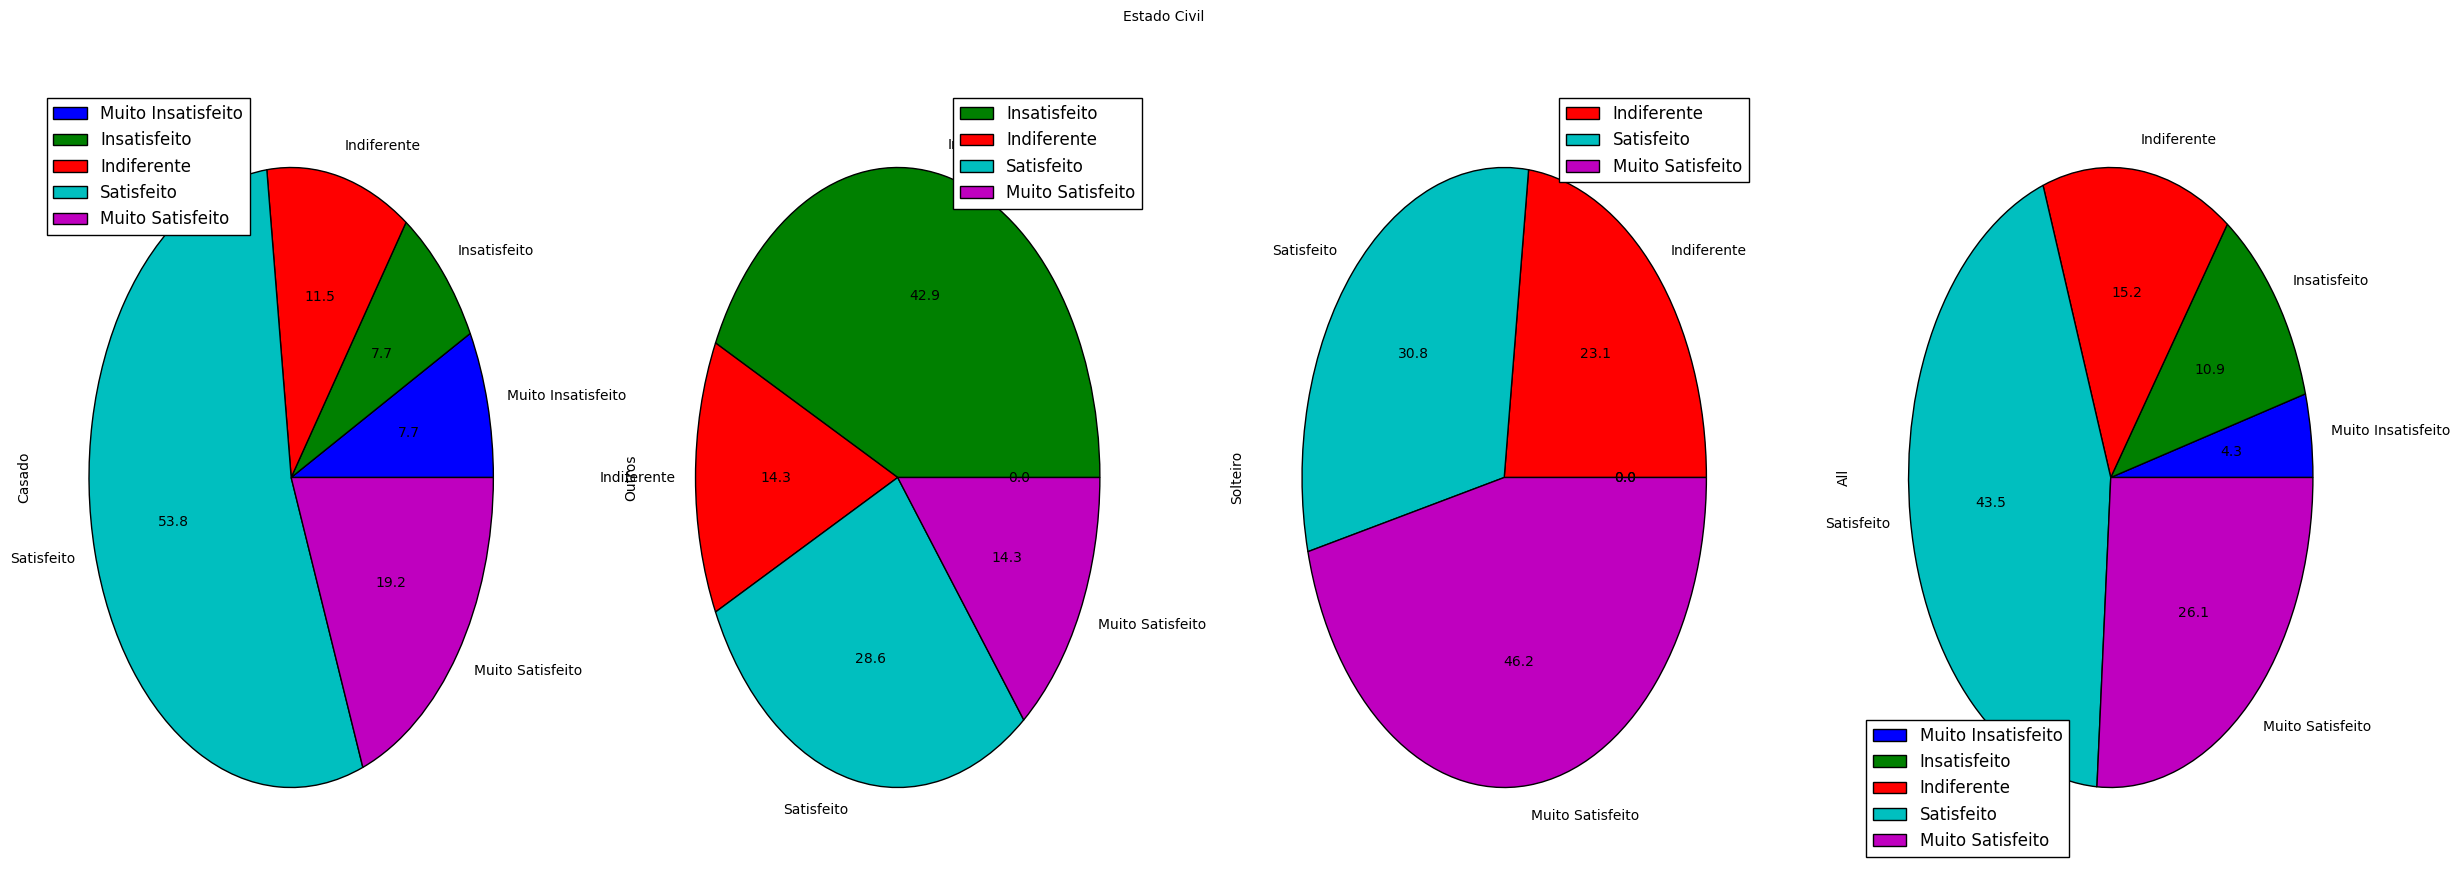

In [39]:
plot = ctECxP_B.plot(kind='pie',title='Estado Civil',autopct='%.1f',figsize=(30, 10),subplots=True)
